In [ ]:
import tensornetwork as tn
import numpy as np
from Holograpic_Code_Library import *

In [ ]:
# Defining some useful constants:
ground_state = np.array([1, 0])
X = np.array([[0, 1], [1, 0]]) # X operator
I = np.eye(2)
PUSHED_OP = np.array([[1,  0], [ 0, -1]])

# Operator Pushing with 1 Layer

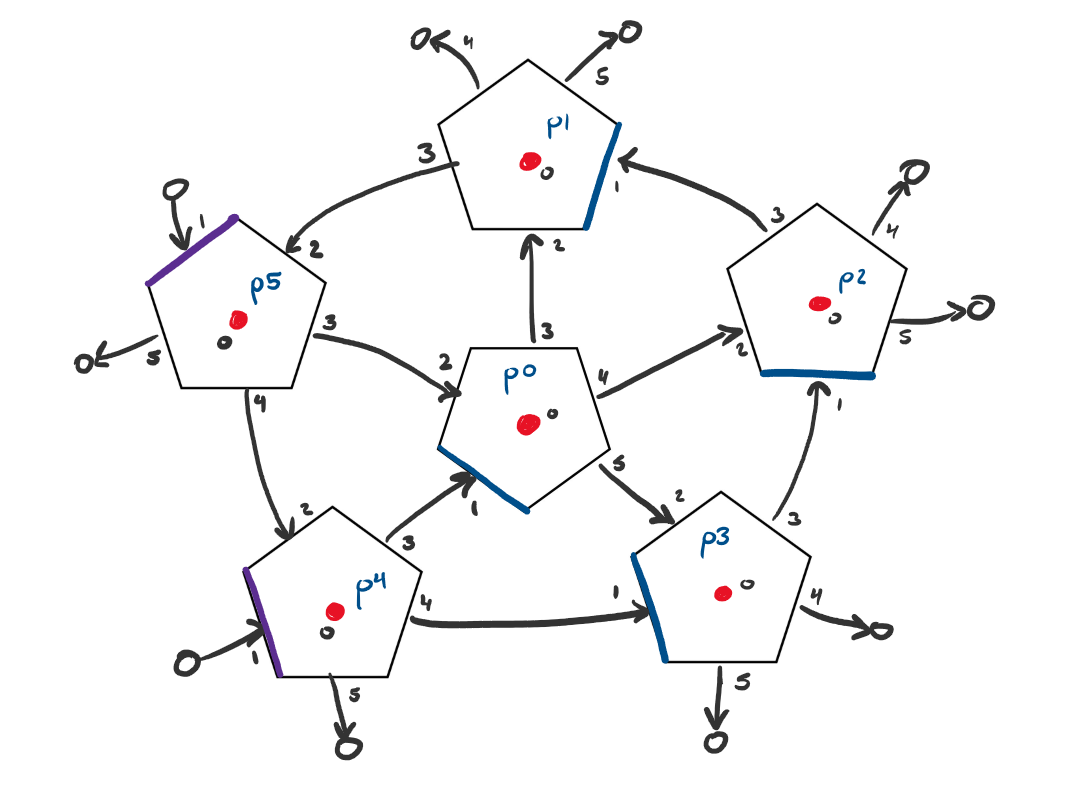

### 2. Operator as tensor approach

In [ ]:
# This function returns a tensor network with an operator on the central bulk qubit.
def six_pentagon_unpushed(operator):

    operator = tensor_product([operator, I, I])
    
    pentagon_0 = new_pentagon_with_operator_to_the_left(operator)
    pentagon_1 = new_pentagon()
    pentagon_2 = new_pentagon()
    pentagon_3 = new_pentagon()
    pentagon_4 = new_pentagon()
    pentagon_5 = new_pentagon()

    # Connect everything:
    network = TN()
    network.connect(pentagon_0[3], pentagon_1[2])
    network.connect(pentagon_0[4], pentagon_2[2])
    network.connect(pentagon_0[5], pentagon_3[2])
    network.connect(pentagon_0[1], pentagon_4[3])
    network.connect(pentagon_0[2], pentagon_5[3])

    network.connect(pentagon_1[3], pentagon_5[2])
    network.connect(pentagon_2[3], pentagon_1[1])
    network.connect(pentagon_3[3], pentagon_2[1])

    network.connect(pentagon_4[4], pentagon_3[1])
    network.connect(pentagon_5[4], pentagon_4[2])


    result = network.get_result() 
    return result

### 3. Push through 1 pentagon, factorize pushed operator, push through other three pentagons

In [ ]:
# ----- INPUT PARAMETERS -----
OPERATOR = X
# OPERATOR = PUSHED_OP
operator = tensor_product([OPERATOR, I, I])
# operator = tensor_product([I, OPERATOR, I])
# operator = tensor_product([I, I, OPERATOR])

# ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 

result_unpushed = six_pentagon_unpushed(OPERATOR)

pushed_operator_0 = get_pushed_operator(operator)
pushed_operator_0_factors = factorize_operator(pushed_operator_0)

operator_1 = tensor_product([I, I, pushed_operator_0_factors[0]])
operator_2 = tensor_product([I, I, pushed_operator_0_factors[1]])
operator_3 = tensor_product([I, I, pushed_operator_0_factors[2]])

pushed_operator_1 = get_pushed_operator(operator_1)
pushed_operator_2 = get_pushed_operator(operator_2)
pushed_operator_3 = get_pushed_operator(operator_3)

pentagon_0 = new_pentagon()
pentagon_1 = new_pentagon_with_operator_to_the_right(pushed_operator_1)
pentagon_2 = new_pentagon_with_operator_to_the_right(pushed_operator_2)
pentagon_3 = new_pentagon_with_operator_to_the_right(pushed_operator_3)
pentagon_4 = new_pentagon()
pentagon_5 = new_pentagon()

network = TN()

network.connect(pentagon_0[3], pentagon_1[2])
network.connect(pentagon_0[4], pentagon_2[2])
network.connect(pentagon_0[5], pentagon_3[2])
network.connect(pentagon_0[1], pentagon_4[3])
network.connect(pentagon_0[2], pentagon_5[3])

network.connect(pentagon_1[3], pentagon_5[2])
network.connect(pentagon_2[3], pentagon_1[1])
network.connect(pentagon_3[3], pentagon_2[1])

network.connect(pentagon_4[4], pentagon_3[1])
network.connect(pentagon_5[4], pentagon_4[2])

result_pushed_twice = network.get_result()

network_equal(result_pushed_twice, result_unpushed)